In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Load the dataset
data_url = 'https://raw.githubusercontent.com/minknhom/dataset/main/walmart_stock_price.csv'
df = pd.read_csv(data_url)




In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Close
0,1972-08-25,0.064453
1,1972-08-28,0.064209
2,1972-08-29,0.063477
3,1972-08-30,0.063477
4,1972-08-31,0.062500
...,...,...
12485,2022-03-01,135.990005
12486,2022-03-02,136.160004
12487,2022-03-03,139.289993
12488,2022-03-04,142.820007


In [3]:
start_date =  pd.to_datetime('2010-01-01')
end_date =  pd.to_datetime('2022-12-31')
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]



In [4]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the dataset
train_size = int(len(df) * 0.8)
test_size = int(len(df) * 0.2)
# validate_size = len(df) - train_size - test_size

train_data = df[:train_size]['Close']
test_data = df[train_size:train_size+test_size]['Close']
# validate_data = df[train_size+test_size:]['Close']


In [5]:
train_data

0        54.230000
1        53.689999
2        53.570000
3        53.599998
4        53.330002
           ...    
2447    118.400002
2448    118.470001
2449    118.300003
2450    118.449997
2451    118.680000
Name: Close, Length: 2452, dtype: float64

In [6]:
test_data

2452    117.849998
2453    116.120003
2454    116.309998
2455    118.160004
2456    117.230003
           ...    
3060    135.990005
3061    136.160004
3062    139.289993
3063    142.820007
3064    141.669998
Name: Close, Length: 613, dtype: float64

In [7]:
# Build the Holt-Winters model
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=5)
model_fit = model.fit()

# Predict for the test and validate sets
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Calculate RMSE for test and validate sets
test_rmse = np.sqrt(mean_squared_error(test_data, test_predictions))


# Calculate the Mean Absolute Percentage Error (MAPE)
test_mape = np.mean(np.abs((test_data - test_predictions) / test_data) * 100)

# Mean Absolute Error (MAE)
test_mae = mean_absolute_error(test_data, test_predictions)

print("Test RMSE:", test_rmse)
print("Test MAPE:", test_mape)
print("Test MAE:", test_mae)

Test RMSE: 11.092635525828841
Test MAPE: 6.4656681404682
Test MAE: 9.030981383774833


In [8]:
# Bonus 30 index
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+32, step=1)

# Predict the closing prices for the next 30 days
y_next_30_days = model_fit.predict(last_index+1, last_index+31)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
3065    134.858199
3066    134.850577
3067    134.851246
3068    134.939857
3069    134.928566
3070    134.989752
3071    134.982130
3072    134.982799
3073    135.071410
3074    135.060118
3075    135.121305
3076    135.113683
3077    135.114352
3078    135.202962
3079    135.191671
3080    135.252858
3081    135.245236
3082    135.245905
3083    135.334515
3084    135.323224
3085    135.384411
3086    135.376789
3087    135.377458
3088    135.466068
3089    135.454777
3090    135.515964
3091    135.508341
3092    135.509011
3093    135.597621
3094    135.586330
3095    135.647516
dtype: float64


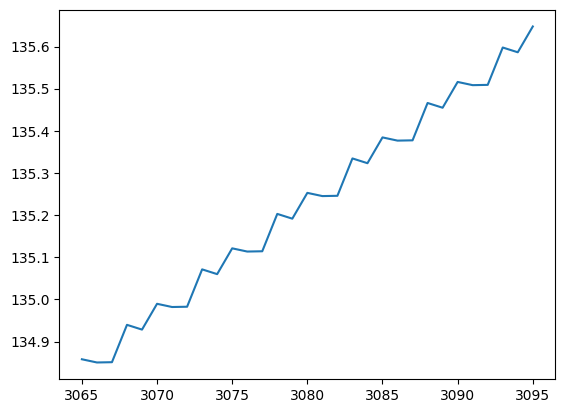

In [9]:
plt.plot(last_data, y_next_30_days)

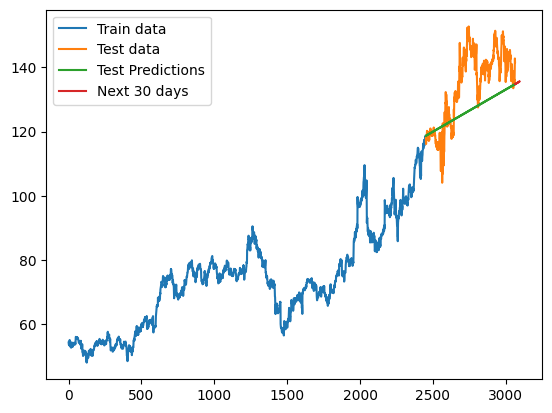

In [10]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
# plt.plot(validate_data.index, validate_data)
plt.plot(test_data.index, test_predictions)
# plt.plot(validate_data.index, validate_predictions)
plt.plot(last_data, y_next_30_days)
plt.legend(['Train data', 'Test data', 'Test Predictions','Next 30 days'])
plt.show()